In [1]:
import random

import numpy as np
import torch
from matplotlib import pyplot as plt
from torch import nn

import base

In [2]:
PATH = "./rnn_demo.pth"

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.rnn = nn.RNN(
            input_size=1,
            hidden_size=16,
            num_layers=1,
            batch_first=True
        )
        self.fc = nn.Linear(16, 1)

    def forward(self, x, h):
        out, hidden_prev = self.rnn(x, h)
        out = out.view(-1, 16)
        out = self.fc(out)
        out = out.unsqueeze(dim=0)
        return out, hidden_prev

In [4]:
def train(save=False):
    net = Net()
    try:
        net.load_state_dict(torch.load(PATH))
        pass
    except FileNotFoundError:
        pass
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
    hidden_prev = torch.zeros(1, 1, 16)

    for i in range(6000):
        strat = np.random.randint(3, size=1)[0]
        time_steps = np.linspace(strat, strat + 10, 50)
        data = np.sin(time_steps)
        x = torch.tensor(data[:-1]).float().view(1, 49, 1)
        y = torch.tensor(data[1:]).float().view(1, 49, 1)

        output, hidden_prev = net(x, hidden_prev)
        hidden_prev = hidden_prev.detach()
        loss = criterion(output, y)
        net.zero_grad()
        loss.backward()
        optimizer.step()

        if not i % 100:
            print(f'{i} loss: {loss}')

    if save:
        torch.save(net.state_dict(), PATH)

In [5]:
def test():
    net = Net()
    try:
        net.load_state_dict(torch.load(PATH))
        pass
    except FileNotFoundError:
        pass
    hidden_prev = torch.zeros(1, 1, 16)
    strat = random.randint(0, 2)
    time_steps = np.linspace(strat, strat + 10, 50)
    data = np.sin(time_steps)
    x = torch.tensor(data[:-1]).float().view(1, 49, 1)

    predictions = []
    e = x[0, 0:3, 0]
    o = x[0, 0, 0]
    for i in range(x.shape[1]):
        o = o.view(1, 1, 1)
        o, hidden_prev = net(o, hidden_prev)
        if i < 3:
            o = e[i]
        predictions.append(o.detach().numpy().ravel()[0])
    x = x.data.numpy().ravel()
    plt.scatter(time_steps[:-1], x, s=5)
    plt.plot(time_steps[:-1], x)
    plt.scatter(time_steps[:-1], predictions, s=5)
    plt.plot(time_steps[:-1], predictions)
    plt.show()
    pass

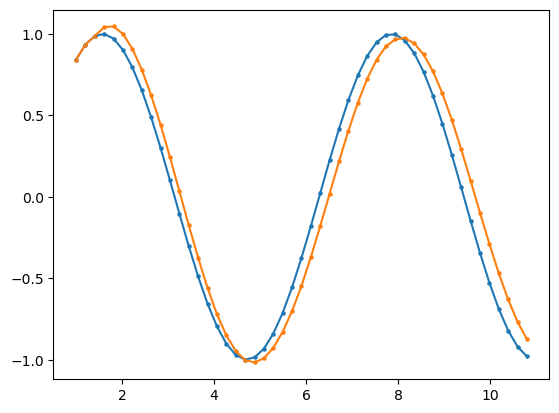

main used time: 0.1319427490234375s


In [6]:
@base.timer
def main():
    # train(True)
    test()
    pass


if __name__ == '__main__':
    main()